In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [6]:
c = cast[(cast.character == "Superman") | (cast.character == "Batman")].groupby(['year', 'character']).size().unstack().fillna(0)
len(c[c.Superman > c.Batman])

12

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
d = cast[(cast.character == "Superman") | (cast.character == "Batman")].groupby(['year', 'character']).size().unstack().fillna(0)
len(d[d.Batman > d.Superman])

24

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

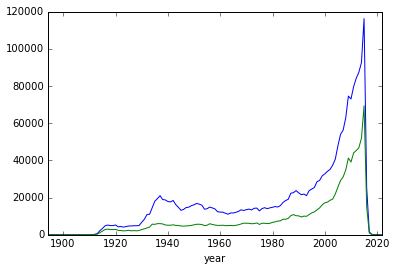

In [8]:
graph = cast[cast.type == "actor"].groupby(['year']).size().plot()
cast[cast.type == "actress"].groupby(['year']).size().plot(ax=graph)

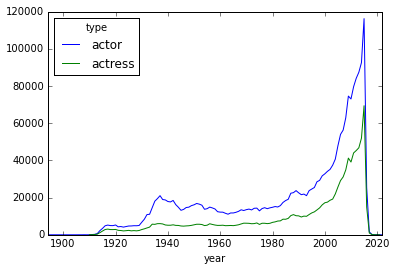

In [19]:
cast.groupby(['year', 'type']).size().unstack().plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

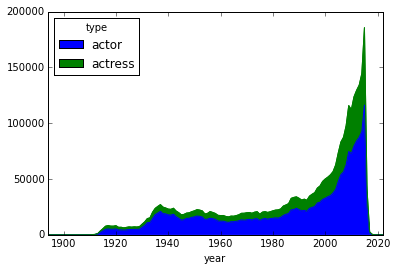

In [32]:
cast.groupby(['year', 'type']).size().unstack().plot(kind="area")

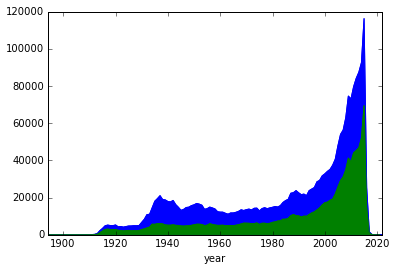

In [31]:
# THIS IS AN INCORRECT ATTEMPT AT SOLVING THE PROBLEM. THE CORRECT SOLUTION IS ABOVE.
graph = cast[cast.type == "actor"].groupby(['year']).size().plot(kind="area")
cast[cast.type == "actress"].groupby(['year']).size().plot(kind="area",ax=graph)

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

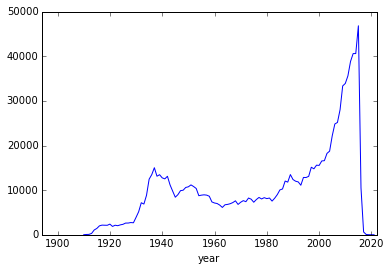

In [11]:
data = cast[cast.type == "actor"].groupby(['year']).size() - cast[cast.type == "actress"].groupby(['year']).size()
data.plot()

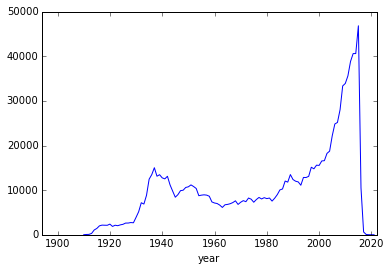

In [26]:
c = cast.groupby(['year', 'type']).size().unstack()
data = c.actor - c.actress
data.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

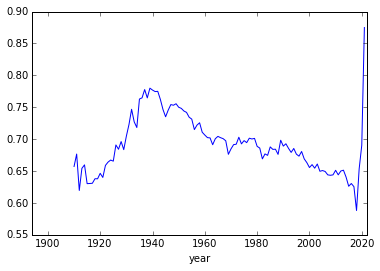

In [49]:
c = cast.groupby(['year', 'type']).size().unstack()
data = c.actor / (c.actor + c.actress)
data.plot()

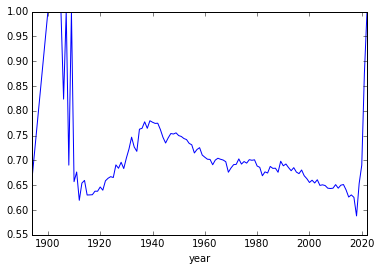

In [48]:
# THIS IS AN INCORRECT ATTEMPT AT SOLVING THE PROBLEM. THE CORRECT SOLUTION IS ABOVE.
data = cast[cast.type == "actor"].groupby(['year']).size() / cast.groupby(['year']).size()
data.plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

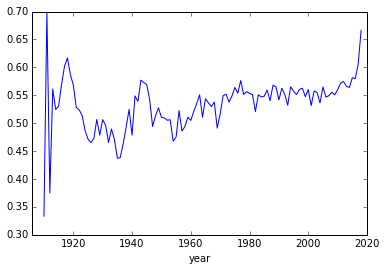

In [51]:
c = cast[cast.n == 2].groupby(['year', 'type']).size().unstack()
data = c.actor / (c.actor + c.actress)
data.plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

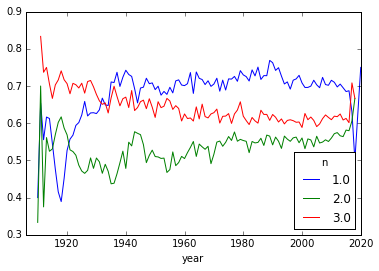

In [60]:
c = cast[cast.n <= 3].groupby(['year', 'type', 'n']).size().unstack('type')
data = c.actor / (c.actor + c.actress)
data.unstack('n').plot()

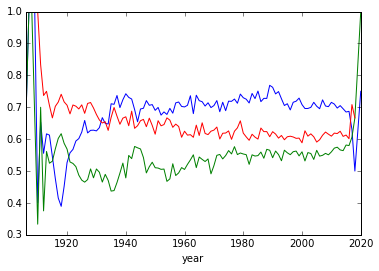

In [52]:
# THIS IS AN INCORRECT ATTEMPT AT SOLVING THE PROBLEM. THE CORRECT SOLUTION IS ABOVE.
first = cast[(cast.type == "actor") & (cast.n == 1)].groupby(['year']).size() / cast[cast.n == 1].groupby(['year']).size()
second = cast[(cast.type == "actor") & (cast.n == 2)].groupby(['year']).size() / cast[cast.n == 2].groupby(['year']).size()
third = cast[(cast.type == "actor") & (cast.n == 3)].groupby(['year']).size() / cast[cast.n == 3].groupby(['year']).size()

axes = first.plot()
second.plot(ax=axes)
third.plot(ax=axes)